# Business Analysis of Sales Data for a Global Retail Superstore by Python

# 1 Problem Statament
A global retail superstore needs to know their sales performance over four years (2011-2015). They are interested in knowing:

- **Overall performance**：sales、sales volume, profit、Average Transaction Value(ATV)、market layout.

- **Products**: commodity composition, popular products, unpopular products.

- **Consumer**: consumer number、RFM analysis、Retention and Churn Rates, Repeat Purchase Rate(RPR).

As a business analyst, I need to make an exploratory data analysis (EDA) and raise pertinence suggestions to increase sales.

# 2 Data collection
Data source: [superstore_data](https://www.kaggle.com/datasets/jr2ngb/superstore-data "Title"), which is a retail dataset of a global superstore for 4 years.
It has a total of 51290 data with 24 features.

# 3、Data pre-processing
## 3.1 Data integration
### 3.1.1 Load related libraries and dataset

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.rcParams['font.sans-serif'] = ['SimHei']
warnings.filterwarnings('ignore')

df = pd.read_csv('superstore_dataset2011-2015.csv',encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


### 3.1.2 Dataset overview

In [8]:
print("Shape:", df.shape)
print("Overview:")
df.describe()

Shape: (51290, 24)
Overview:


,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


## 3.2 Data cleaning
### 3.2.1 Rename column names
Column names do not conform to Python's naming convention, so we renamed the column names, using underscore naming

In [9]:
df.rename(columns = lambda x: x.replace(' ', '_').replace('-', '_'), inplace=True)
df.columns

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country',
       'Postal_Code', 'Market', 'Region', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority'],
      dtype='object')

### 3.2.2 Data type processing

In [10]:
print("Data type of each column:")
df.dtypes

Data type of each column:


Row_ID              int64
Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_ID        object
Customer_Name      object
Segment            object
City               object
State              object
Country            object
Postal_Code       float64
Market             object
Region             object
Product_ID         object
Category           object
Sub_Category       object
Product_Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping_Cost     float64
Order_Priority     object
dtype: object

The type of order-time should be datetime which needs to be processed

In [11]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df["Order_Date"].sample(5)

18376   2014-10-05
3822    2012-01-11
39601   2014-08-24
45987   2014-03-28
15191   2014-04-08
Name: Order_Date, dtype: datetime64[ns]

To facilitate analysis of annual and monthly sales, add two columns year and month.

In [12]:
df['year'] = df["Order_Date"].dt.year
df['month'] = df['Order_Date'].values.astype('datetime64[M]')

### 3.2.3 Missing value processing


In [13]:
print("Missing values:")
df.isnull().sum(axis=0)

Missing values:


Row_ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer_Name         0
Segment               0
City                  0
State                 0
Country               0
Postal_Code       41296
Market                0
Region                0
Product_ID            0
Category              0
Sub_Category          0
Product_Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
year                  0
month                 0
dtype: int64

The zip code information column has lots of missing values, which are not very useful for analysis and are directly deleted.

In [14]:
df.drop(["Postal_Code"],axis=1, inplace=True)

### 3.2.4 Outlier processing

In [15]:
df.describe()

,Row_ID,Sales,Quantity,Discount,Profit,Shipping_Cost,year
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,246.490581,3.476545,0.142908,28.610982,26.375915,2012.777208
std,14806.29199,487.565361,2.278766,0.212280,174.340972,57.296804,1.098931
min,1.00000,0.444000,1.000000,0.000000,-6599.978000,0.000000,2011.000000
25%,12823.25000,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,25645.50000,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,38467.75000,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,51290.00000,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


No obvious outliers were found and no processing is required.

### 3.2.5 Repeat value processing

In [16]:
print("Repeat value:")
df.duplicated().sum()

Repeat value:


0

No repeat values were found and no processing is required.

# 4 Data analysis

## 4.1 Overall analysis
Constructing the sub-data set

In [17]:
sales_data = df[['Order_Date','Sales','Quantity','Profit','year','month']]
sales_data.sample(5)

,Order_Date,Sales,Quantity,Profit,year,month
29762,2013-10-18,111.480,4,55.680,2013,2013-10-01
27563,2012-08-17,1124.580,2,281.100,2012,2012-08-01
20603,2013-06-13,899.208,2,79.908,2013,2013-06-01
47645,2012-05-29,91.860,1,37.660,2012,2012-05-01
19871,2014-12-10,560.100,5,5.600,2014,2014-12-01


Summation of sub-datasets grouped by year and month.

In [18]:
sales_year = sales_data.groupby(['year','month']).sum()
sales_year

Sales  Quantity       Profit
year month                                          
2011 2011-01-01  138241.30042      2178  13457.23302
     2011-02-01  134969.94086      1794  17588.83726
     2011-03-01  171455.59372      2183  16169.36062
     2011-04-01  128833.47034      2181  13405.46924
     2011-05-01  148146.72092      2057  14777.45792
     2011-06-01  189338.43966      2715  25932.87796
     2011-07-01  162034.69756      2266  10631.84406
     2011-08-01  219223.49524      2909  19650.67124
     2011-09-01  255237.89698      3357  32313.25458
     2011-10-01  204675.07846      2615  30745.54166
     2011-11-01  214934.29386      3165  21261.40536
     2011-12-01  292359.96752      4023  33006.85862
2012 2012-01-01  162800.89338      2150  19627.42058
     2012-02-01  152661.15144      2156  17828.18244
     2012-03-01  201608.72784      2880  22752.87684
     2012-04-01  187469.96192      2506  20804.00532
     2012-05-01  218960.16042      3239  22865.39572
     2012-06-01  249289.77172      3508  34358.03962
     2012-07-01  174394.02808      2551  21725.18808
     2012-08-01  271669.66086      3451  36511.44996
     2012-09-01  256567.85308      3752  25039.93498
     2012-10-01  239321.09904      3399  27773.87454
     2012-11-01  270723.05356      4497  26160.60686
     2012-12-01  291972.33306      4022  31968.30416
2013 2013-01-01  206459.19582      2766  26052.40252
     2013-02-01  191062.77216      2535  31553.99756
     2013-03-01  230547.79468      3130  34873.71938
     2013-04-01  233181.34844      3161  26008.05144
     2013-05-01  304509.96336      4115  39053.30946
     2013-06-01  341162.34370      4948  43298.85000
     2013-07-01  223642.65664      3594  27019.91294
     2013-08-01  323876.60716      4564  32977.75576
     2013-09-01  326897.27044      5067  18850.09084
     2013-10-01  270121.87570      3977  27871.97470
     2013-11-01  383039.21248      5274  51720.88568
     2013-12-01  371245.40880      5005  47654.27990
2014 2014-01-01  268265.52240      3656  31447.74660
     2014-02-01  244159.30486      3450  29454.01876
     2014-03-01  347720.96868      4820  50097.04458
     2014-04-01  302132.54000      4397  35709.53320
     2014-05-01  304798.83604      4415  34335.60404
     2014-06-01  372577.23298      5528  40869.02108
     2014-07-01  278672.17326      3867  26450.70856
     2014-08-01  432731.04194      5506  46443.47934
     2014-09-01  405436.70584      5741  52533.83284
     2014-10-01  406659.41500      5915  52342.49740
     2014-11-01  508954.73156      7020  55561.72406
     2014-12-01  427757.39800      6307  48920.76000

Split the above data, one table for each year

In [19]:
year_2011 = sales_year.loc[(2011,slice(None)),:].reset_index()
year_2012 = sales_year.loc[(2012,slice(None)),:].reset_index()
year_2013 = sales_year.loc[(2013,slice(None)),:].reset_index()
year_2014 = sales_year.loc[(2014,slice(None)),:].reset_index()
year_2014

,year,month,Sales,Quantity,Profit
0,2014,2014-01-01,268265.52240,3656,31447.74660
1,2014,2014-02-01,244159.30486,3450,29454.01876
2,2014,2014-03-01,347720.96868,4820,50097.04458
3,2014,2014-04-01,302132.54000,4397,35709.53320
4,2014,2014-05-01,304798.83604,4415,34335.60404
5,2014,2014-06-01,372577.23298,5528,40869.02108
6,2014,2014-07-01,278672.17326,3867,26450.70856
7,2014,2014-08-01,432731.04194,5506,46443.47934
8,2014,2014-09-01,405436.70584,5741,52533.83284
9,2014,2014-10-01,406659.41500,5915,52342.49740


### 4.1.1 Sales analysis

In [20]:
sales=pd.concat([year_2011['Sales'],year_2012['Sales'],
                 year_2013['Sales'],year_2014['Sales']],axis=1)

sales.columns=['Sales-2011','Sales-2012','Sales-2013','Sales-2014']
sales.index=['Jau','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# The darker the color, the higher the sales
sales.style.background_gradient()

,Sales-2011,Sales-2012,Sales-2013,Sales-2014
Jau,138241.300420,162800.893380,206459.195820,268265.522400
Feb,134969.940860,152661.151440,191062.772160,244159.304860
Mar,171455.593720,201608.727840,230547.794680,347720.968680
Apr,128833.470340,187469.961920,233181.348440,302132.540000
May,148146.720920,218960.160420,304509.963360,304798.836040
Jun,189338.439660,249289.771720,341162.343700,372577.232980
Jul,162034.697560,174394.028080,223642.656640,278672.173260
Aug,219223.495240,271669.660860,323876.607160,432731.041940
Sep,255237.896980,256567.853080,326897.270440,405436.705840
Oct,204675.078460,239321.099040,270121.875700,406659.415000


From the above chart can be seen, basically every year is the second half of sales than the first half of the year, and with the increase in the year, there is a significant increase in sales, indicating that sales growth is faster, the development is still relatively good.

What can be seen is that each year's sales are better than the previous year, to actually calculate the specific growth rate and the total sales per year

,sales_sum,rise_rate
Sales-2011,2.259451e+06,0.000000
Sales-2012,2.677439e+06,0.184995
Sales-2013,3.405746e+06,0.272017
Sales-2014,4.299866e+06,0.262533


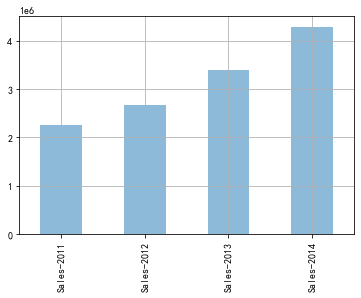

In [21]:
# Annual sales and graphical presentation
sales_sum=sales.sum()
sales_sum.plot(kind='bar',alpha=0.5)
plt.grid()

# Annual growth rate
rise_12=sales_sum[1]/sales_sum[0]-1
rise_13=sales_sum[2]/sales_sum[1]-1
rise_14=sales_sum[3]/sales_sum[2]-1
rise_rate=[0,rise_12,rise_13,rise_14]

# Show growth rate
sales_sum=pd.DataFrame({'sales_sum':sales_sum})
sales_sum['rise_rate']=rise_rate
sales_sum

From the above, we can see that the sales growth rate in the latter two years reached 26%, and the sales in 2014 were nearly twice as high as in 2011, with good development momentum and the operation in gradual stabilization. Combining annual sales and growth rates with the company's overall strategic plan, the total sales performance targets for the next year can be predicted or set.

After understanding the overall sales of the supermarket, then analyze the monthly sales of each year to understand the sales of different months, to find out whether there is an off-peak season, to find out the key sales months, in order to develop business strategies and performance monthly and quarterly indicators split.

Stacked area chart of sales.

<AxesSubplot:>

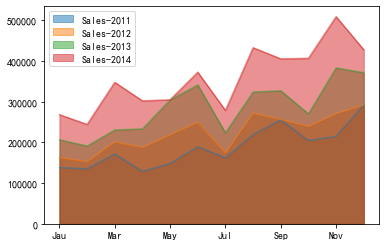

In [22]:
sales.plot.area(stacked=False)

The chart above shows that the supermarket's sales are seasonal, with the first half of the year being the low season and the second half being the high season overall. Sales are higher in June in the first half of the year and lower in July in the second half of the year.

For the high season months, the operation and promotion strategies should be maintained, and more investment can be made to increase the overall sales.
For the off-season months, you can combine the product features to expand new products, hold some promotional activities to attract customers.


### 4.1.2 Sales Volume Analysis
Build sales volume table

In [23]:
quantity = pd.concat([year_2011['Quantity'],year_2012['Quantity'],
                 year_2013['Quantity'],year_2014['Quantity']],axis=1)

# Rename row and column names
quantity.columns=['Quantity-2011','Quantity-2012','Quantity-2013','Quantity-2014']
quantity.index=['Jau','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# The darker the color, the higher the sales volume
quantity.style.background_gradient()

,Quantity-2011,Quantity-2012,Quantity-2013,Quantity-2014
Jau,2178,2150,2766,3656
Feb,1794,2156,2535,3450
Mar,2183,2880,3130,4820
Apr,2181,2506,3161,4397
May,2057,3239,4115,4415
Jun,2715,3508,4948,5528
Jul,2266,2551,3594,3867
Aug,2909,3451,4564,5506
Sep,3357,3752,5067,5741
Oct,2615,3399,3977,5915


Sales volume growth rate and total annual sales volume

,quantity_sum,rise_rate
Quantity-2011,31443,0.000000
Quantity-2012,38111,0.212066
Quantity-2013,48136,0.263047
Quantity-2014,60622,0.259390


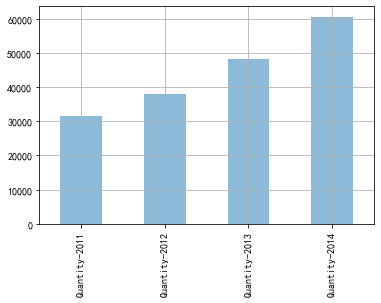

In [24]:
# Annual sales volume and graphical presentation
quantity_sum=quantity.sum()
quantity_sum.plot(kind='bar',alpha=0.5)
plt.grid()

# Annual growth rate
rise_12=quantity_sum[1]/quantity_sum[0]-1
rise_13=quantity_sum[2]/quantity_sum[1]-1
rise_14=quantity_sum[3]/quantity_sum[2]-1
rise_rate=[0,rise_12,rise_13,rise_14]

# Show annual growth rate
quantity_sum=pd.DataFrame({'quantity_sum':quantity_sum})
quantity_sum['rise_rate']=rise_rate
quantity_sum

As seen above, the trend in sales volume from 2011-2014 is the same as sales, with the second half of the year overall higher than the first half of the year, while sales are improving year-over-year.

### 4.1.3 Profit Analysis
Constructing the profit table

In [25]:
profit=pd.concat([year_2011['Profit'],year_2012['Profit'],
                 year_2013['Profit'],year_2014['Profit']],axis=1)
profit.columns=['Profit-2011','Profit-2012','Profit-2013','Profit-2014']
profit.index=['Jau','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

profit.style.background_gradient()

,Profit-2011,Profit-2012,Profit-2013,Profit-2014
Jau,13457.233020,19627.420580,26052.402520,31447.746600
Feb,17588.837260,17828.182440,31553.997560,29454.018760
Mar,16169.360620,22752.876840,34873.719380,50097.044580
Apr,13405.469240,20804.005320,26008.051440,35709.533200
May,14777.457920,22865.395720,39053.309460,34335.604040
Jun,25932.877960,34358.039620,43298.850000,40869.021080
Jul,10631.844060,21725.188080,27019.912940,26450.708560
Aug,19650.671240,36511.449960,32977.755760,46443.479340
Sep,32313.254580,25039.934980,18850.090840,52533.832840
Oct,30745.541660,27773.874540,27871.974700,52342.497400


Calculate total profit and profit margin per year

,profit_sum,year,sales_sum,profit_rate
0,248940.81154,2011,2.259451e+06,0.110178
1,307415.27910,2012,2.677439e+06,0.114817
2,406935.23018,2013,3.405746e+06,0.119485
3,504165.97046,2014,4.299866e+06,0.117252


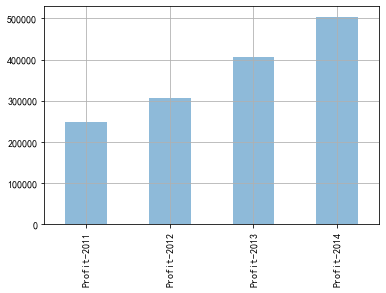

In [26]:
profit_sum=profit.sum()
profit_sum.plot(kind='bar',alpha=0.5)
plt.grid()

profit_sum=pd.DataFrame({'profit_sum':profit_sum})
profit_sum["year"] =  [2011, 2012, 2013, 2014]

sales_sum=pd.DataFrame({'sales_sum':sales.sum()})
sales_sum["year"] =  [2011, 2012, 2013, 2014]

profit_sum = pd.merge(profit_sum, sales_sum)
profit_sum["profit_rate"] = profit_sum["profit_sum"] / profit_sum["sales_sum"]
profit_sum

From the above results, it can be seen that the annual profit, like sales, is increasing year by year, indicating that the business is still operating properly, but the profit margin is generally stable, between 11% and 12%, and the overall profit margin is also still good.

### 4.1.4 Average Transaction Value (ATV)
Average transaction value is the average amount of money spent by a consumer on a single transaction. 

Total amount of transactions：all purchases made by the same consumer in the same day are defined as one transaction.

ATV= total amount of consumption / total amount of transactions

In [48]:
# 2011-2014 ATV
for i in range(2011,2015):
    data=df[df['year']==i]
    price=data[['Order_Date','Customer_ID','Sales']]

    # Calculate the total amount of transactions
    price_dr=price.drop_duplicates(
        subset=['Order_Date', 'Customer_ID'])

    # The total amount of transactions: rows
    total_num=price_dr.shape[0]
    print('The total amount of transactions of {} ='.format(i),total_num)

    unit_price = price['Sales'].sum()/total_num
    print('ATV of {}='.format(i), unit_price,'\n')

The total amount of transactions of 2011 = 4453
ATV of 2011= 507.3997070604087 

The total amount of transactions of 2012 = 5392
ATV of 2012= 496.55762136498515 

The total amount of transactions of 2013 = 6753
ATV of 2013= 504.3308824788983 

The total amount of transactions of 2014 = 8696
ATV of 2014= 494.4647965225391 



From the above results, it can be seen that the number of transactions per year is on the rise, but the overall fluctuation of the average transaction value  is not very large, stable at around 500.

### 4.1.5 Market Layout Analysis
As a gloabl superstore，we need to check up the sales among the different regional markets：

In [29]:
Market_Year_Sales = df.groupby(['Market', 'year']).agg({'Sales':'sum'}).reset_index().rename(columns={'Sales':'Sales_amounts'})
Market_Year_Sales.head()

,Market,year,Sales_amounts
0,APAC,2011,6.392453e+05
1,APAC,2012,7.627193e+05
2,APAC,2013,9.745809e+05
3,APAC,2014,1.209199e+06
4,Africa,2011,1.271873e+05


Build graphs to show annual sales in different regions：

Text(0.5, 1.0, '2011-2014 market sales')

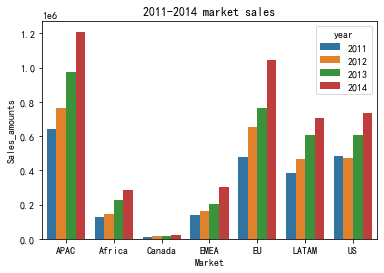

In [33]:
sns.barplot(x='Market', y='Sales_amounts', hue='year', data = Market_Year_Sales)
plt.title('2011-2014 market sales')

Sales by region as a percentage of total sales over four years.

In [32]:
Market_Sales = df.groupby(['Market']).agg({'Sales':'sum'})
Market_Sales["percent"] = Market_Sales["Sales"] / df["Sales"].sum()
Market_Sales.style.background_gradient()

,Sales,percent
Market,,
APAC,3585744.129000,0.283626
Africa,783773.211000,0.061995
Canada,66928.170000,0.005294
EMEA,806161.311000,0.063766
EU,2938089.061500,0.232398
LATAM,2164605.167080,0.171217
US,2297200.860300,0.181705


As can be seen from the above table, annual sales in each region are generally on an upward trend, with APAC (Asia Pacific), EU (European Union), US (United States) and LATAM (Latin America) accounting for over 85% of total sales. The trend generally matches the economic development of each region. Of these, sales in Canada are negligible and we can decide whether to give up the Canadian market in the context of the company's overall strategic layout.

## 4.2 Product Analysis
Take a look at the top 10 selling products first：

In [36]:
productId_count = df.groupby('Product_ID').count()['Customer_ID'].sort_values(ascending=False)
productId_count.head(10)

Product_ID
OFF-AR-10003651    35
OFF-AR-10003829    31
OFF-BI-10002799    30
OFF-BI-10003708    30
FUR-CH-10003354    28
OFF-BI-10002570    27
OFF-BI-10004140    25
OFF-BI-10004195    24
OFF-BI-10003650    24
OFF-BI-10004632    24
Name: Customer_ID, dtype: int64

Top 10 selling products first：

In [37]:
productId_amount = df.groupby('Product_ID').sum()['Sales'].sort_values(ascending=False)
productId_amount.head(10)

Product_ID
TEC-CO-10004722    61599.8240
TEC-PH-10004664    30041.5482
OFF-BI-10003527    27453.3840
TEC-MA-10002412    22638.4800
TEC-PH-10004823    22262.1000
FUR-CH-10002024    21870.5760
FUR-CH-10000027    21329.7300
OFF-AP-10004512    21147.0840
FUR-TA-10001889    20730.7557
OFF-BI-10001359    19823.4790
Name: Sales, dtype: float64

As you can see from the above, most of the highest sales are office supplies, while most of the highest sales are for electronics and furniture, which are higher-priced products per unit.

Top 10 profit-making products:

In [38]:
productId_Profit= df.groupby('Product_ID').sum()['Profit'].sort_values(ascending=False)
productId_Profit.head(10)

Product_ID
TEC-CO-10004722    25199.9280
OFF-AP-10004512    10345.5840
TEC-PH-10004823     8121.4800
OFF-BI-10003527     7753.0390
TEC-CO-10001449     6983.8836
FUR-CH-10002250     6123.2553
TEC-PH-10004664     5455.9482
OFF-AP-10002330     5452.4640
TEC-PH-10000303     5356.8060
FUR-CH-10002203     5003.1000
Name: Profit, dtype: float64

Half of the top 10 profit products are electronic products, and you can focus on increasing the sales of these products to increase the overall profit.

Sales of specific product categories：

In [47]:
# Reclassify categories based on the existing products category and sub-categories
df['Category_Sub_Category'] = df[['Category','Sub_Category']].apply(lambda x:str(x[0])+'_'+str(x[1]),axis=1)
# Grouping by new categories, counting sales and profits
df_Category_Sub_Category=df.groupby("Category_Sub_Category").agg({"Profit":"sum","Sales":"sum"}).reset_index()
# Sorted by sales in reverse order
df_Category_Sub_Category.sort_values(by=["Sales"],ascending=False, inplace=True)
# Cumulative percentage of sales for each category of products
df_Category_Sub_Category['cum_percent'] = df_Category_Sub_Category['Sales'].cumsum()/df_Category_Sub_Category['Sales'].sum()
df_Category_Sub_Category

,Category_Sub_Category,Profit,Sales,cum_percent
16,Technology_Phones,216717.00580,1.706824e+06,0.135007
14,Technology_Copiers,258567.54818,1.509436e+06,0.254401
1,Furniture_Chairs,140396.26750,1.501682e+06,0.373181
0,Furniture_Bookcases,161924.41950,1.466572e+06,0.489184
11,Office Supplies_Storage,108461.48980,1.127086e+06,0.578335
4,Office Supplies_Appliances,141680.58940,1.011064e+06,0.658308
15,Technology_Machines,58867.87300,7.790601e+05,0.719931
3,Furniture_Tables,-64083.38870,7.570419e+05,0.779811
13,Technology_Accessories,129626.30620,7.492370e+05,0.839075
6,Office Supplies_Binders,72449.84600,4.619115e+05,0.875611


From the table you can clearly see the comparison of the sales contribution of different kinds of products. Nearly half of the total sales of products accounted for 84%, which should be the popular feature products. In the subsequent business operation，we should increase the investment on these products to gradually shape our own brand.

At the same time, it can also be found that most of the products accounting for 16% of the total sales at the end rows are small items in office supplies. Consideration could be given to combining them with other popular products in selling, or optimising these products.

However, it is interesting to note that the profit on **Tables** is negative, indicating that this product was then in a loss-making position. By checking the original data, it was found that most of the Tabels were on sale, with a whopping 76% of sales. Therefore, an excessive promotional concession could be the most likely reason behind it. If the company were clearing stock, this was still a good effect, but if not, it means that this product had encountered a bottleneck in marketing or a strong competitor, and needed to be analysed in the context of the actual business to improve the business strategy appropriately.

## 4.3 Customer Analysis
### 4.3.1 Percentage of customers of different types

<AxesSubplot:ylabel='Segment'>

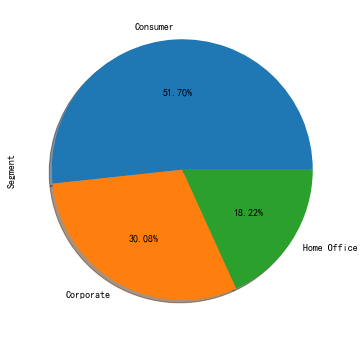

In [40]:
df["Segment"].value_counts().plot(kind='pie', autopct='%.2f%%', shadow=True, figsize=(14, 6))

As you can see from the chart above, the largest proportion of customers over the four years were mass consumers, accounting for 51.7%, .

Next Look at the number of different types of customers in each year: 

Text(0.5, 1.0, '2011-2014 Segment Customer')

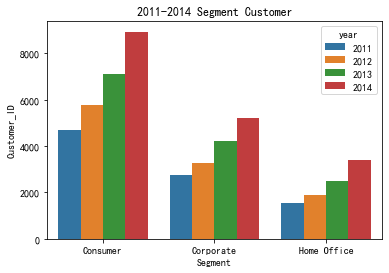

In [51]:
Segment_Year = df.groupby(["Segment", 'year']).agg({'Customer_ID':'count'}).reset_index()
sns.barplot(x='Segment', y='Customer_ID', hue='year', data = Segment_Year)
plt.title('2011-2014 Segment Customer')

As you can see from the above, the customer structure is good with each type of customer maintaining a growing trend each year.

Next Look at the annual sales contributed by different types of customers:

Text(0.5, 1.0, '2011-2014 Segment Sales')

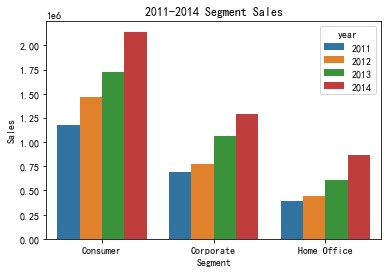

In [52]:
Segment_sales = df.groupby(["Segment", 'year']).agg({'Sales':'sum'}).reset_index()
sns.barplot(x='Segment', y='Sales', hue='year', data = Segment_sales)
plt.title('2011-2014 Segment Sales')

The sales contributed by all types of customers have been steadily increasing each year, with the mass consumers contributing the most sales, which is also related to the percentage of customers.

### 4.3.2 Purchase Behavior Analysis
Intercept Customer_ID, Order_Date, Quantity, Sales, month as a new subset to make analysis：

In [42]:
grouped_Customer = df[['Customer_ID','Order_Date', 'Quantity', 'Sales', 'month']].sort_values(['Order_Date']).groupby('Customer_ID')
grouped_Customer.head()

,Customer_ID,Order_Date,Quantity,Sales,month
0,TB-11280,2011-01-01,2,408.300,2011-01-01
1,JH-15985,2011-01-01,3,120.366,2011-01-01
2,AT-735,2011-01-01,4,66.120,2011-01-01
3,EM-14140,2011-01-01,3,44.865,2011-01-01
4,JH-15985,2011-01-01,5,113.670,2011-01-01
...,...,...,...,...,...
43838,AD-180,2014-12-26,4,275.712,2014-12-01
43902,DB-3555,2014-12-26,1,18.180,2014-12-01
43878,AD-180,2014-12-26,2,158.760,2014-12-01
43914,AD-180,2014-12-26,2,4.272,2014-12-01


Distribution of datas of consumers' first transaction：

<AxesSubplot:>

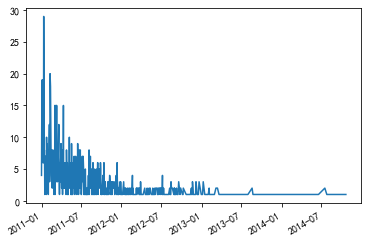

In [44]:
grouped_Customer.min().Order_Date.value_counts().plot()

Distribution of datas of consumers' last transaction：

<AxesSubplot:>

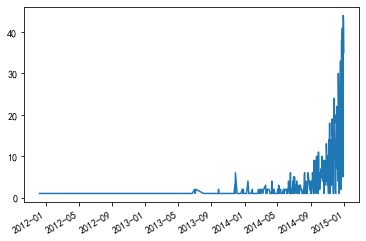

In [45]:
grouped_Customer.max().Order_Date.value_counts().plot()

From above, we can see that the growth of new consumers is slow since the beginning of the year 2013. On account of this, the business should take actions to attract more new consumers through advertising and other promotional campaigns. In addition, by looking at the date of the last transaction, we can see that there is generally no loss of consumers, which also validates the trend of annual sales growth.

Overall the number of new customers is decreasing year on year, indicating that the business is maintaining its old customers well, but the rate of new customer acquisition is low. If a breakthrough could be made in new customer acquisition, it would give the business a lot of room for growth.   

Number of customers with only one transaction：

In [46]:
# Find the first and last transaction of each consumer 
Customer_life = grouped_Customer.Order_Date.agg(['min','max'])
# Check the number of customers with only one transaction
(Customer_life['min'] == Customer_life['max']).value_counts()

False    1580
True       10
dtype: int64

The results show that only 10 consumers purchased only once. With most of them buying multiple times, it indicates a high rate of repeat purchase rate and confirms the conclusion above about the good retention of the regular customers.

### 4.3.3 RFM Analysis
What is RFM：

**R（Recency)**: The interval between the customer's most recent transactions. A larger R value indicates a longer interval when the customer's transaction took place, and vice versa, a more recent date when the customer's transaction took place.    

**F（Frequency)**：The number of transaction of one customer in the most recent period; a higher F value indicates that the client is trading more frequently, while the opposite indicates that the client is not trading actively enough.

**M（Monetary)**: The amount of money a customer has transacted in the most recent period; a higher M value indicates a higher customer value and vice versa.

In a word, RFM analysis is a marketing technique used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

Build RFM table first：

In [49]:
rfm = df.pivot_table(index='Customer_ID',
                    values = ["Order_ID","Sales","Order_Date"],
              aggfunc={"Order_ID":"count","Sales":"sum","Order_Date":"max"})

# The largest date of the transaction for all consumers is the criterion, and the time interval for each transaction is R
rfm['R'] = (rfm.Order_Date.max() - rfm.Order_Date)/np.timedelta64(1,'D')
# The number of orders per customer is F and the total sales is M
rfm.rename(columns={'Order_ID':'F','Sales':'M'},inplace = True)
rfm.head()

,Order_Date,F,M,R
Customer_ID,,,,
AA-10315,2014-12-23,42,13747.41300,8.0
AA-10375,2014-12-25,42,5884.19500,6.0
AA-10480,2014-09-05,38,17695.58978,117.0
AA-10645,2014-12-05,73,15343.89070,26.0
AA-315,2014-12-29,8,2243.25600,2.0


The customers are then labelled and divided into 8 levels（2 x 2 x 2）：

In [53]:
# Compare the average value, above the mean is 1, otherwise is 0
rfm[['R','F','M']].apply(lambda x:x-x.mean())

def rfm_func(x):
    level =x.apply(lambda x:'1'if x>0 else '0')
    level =level.R +level.F +level.M
    d = {
        "111":"Champions",
        "011":"Customers Can't be Lost",
        "101":"Potential Loyalist",
        "001":"Customers Needing Attention",
        "110":"Loyal Customers",
        "010":"Customers At Risk",
        "100":"Promising Customers",
        "000":"Lost Customers"
    }
    result = d[level]
    return result

rfm['label']= rfm[['R','F','M']].apply(lambda x:x-x.mean()).apply(rfm_func,axis =1)
rfm.head()

,Order_Date,F,M,R,label
Customer_ID,,,,,
AA-10315,2014-12-23,42,13747.41300,8.0,Customers Can't be Lost
AA-10375,2014-12-25,42,5884.19500,6.0,Customers At Risk
AA-10480,2014-09-05,38,17695.58978,117.0,Champions
AA-10645,2014-12-05,73,15343.89070,26.0,Customers Can't be Lost
AA-315,2014-12-29,8,2243.25600,2.0,Lost Customers


Visualization of customers according to monetary：

<AxesSubplot:xlabel='F', ylabel='R'>

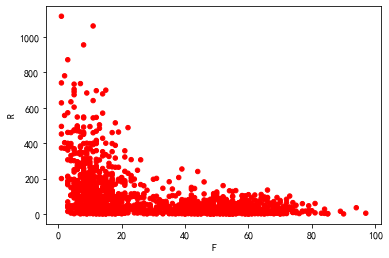

In [55]:
rfm.loc[rfm.label=='high-spending customers','color']='g'
rfm.loc[~(rfm.label=='low-spending customers'),'color']='r'
rfm.plot.scatter('F','R',c= rfm.color)

By identifying different customer groups through RFM, it is possible to measure the value of customers and their profit-generating capacity. This allows personalised communication and marketing services to be specified and provides strong support for more marketing decisions in order to create greater benefits for the business.

### 4.3.4 New Customers, Active Customers、Unactive Customers and Returning Customers 
Set "Customer_ID" as the index and "month" as the column name to count the number of transactions per month: 

In [56]:
pivoted_counts = df.pivot_table(index= 'Customer_ID',
                               columns= 'month',
                               values= 'Order_Date',
                               aggfunc= 'count').fillna(0)
# All number of transactions greater than once is set to 1
df_purchase = pivoted_counts.applymap(lambda x:1 if x>0 else 0)
df_purchase.head()

month,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,...,2014-03-01,2014-04-01,2014-05-01,2014-06-01,2014-07-01,2014-08-01,2014-09-01,2014-10-01,2014-11-01,2014-12-01
Customer_ID,,,,,,,,,,,,,,,,,,,,,
AA-10315,0,0,1,1,0,0,0,0,1,0,...,0,1,0,1,1,1,0,0,0,1
AA-10375,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,1,0,1,1,1
AA-10480,1,0,1,1,0,1,0,1,0,0,...,1,1,1,0,0,1,1,0,0,0
AA-10645,1,0,0,1,0,1,1,0,0,0,...,1,1,0,1,0,0,0,1,1,1
AA-315,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1


Define status and give a label

In [57]:
def active_status(data):
    status = []
    for i in range(48):
        if data[i] == 0:
            if len(status)>0:
                if status[i-1] == "unreg":
                	# Unregistered customers
                    status.append("unreg")
                else:
                	# Unactive customers
                    status.append("unactive")
            else:
                status.append("unreg")

        # If any transaction this month
        else:
            if len(status) == 0:
            	# New customers
                status.append("new")
            else:
                if status[i-1] == "unactive":
                	# Returning customers
                    status.append("return")
                elif status[i-1] == "unreg":
                    status.append("new")
                else:
                    status.append("active")
    return pd.Series(status)

purchase_stats = df_purchase.apply(active_status,axis =1)
purchase_stats.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Customer_ID,,,,,,,,,,,,,,,,,,,,,
AA-10315,unreg,unreg,new,active,unactive,unactive,unactive,unactive,return,unactive,...,unactive,return,unactive,return,active,active,unactive,unactive,unactive,return
AA-10375,unreg,unreg,unreg,new,unactive,unactive,return,unactive,unactive,return,...,unactive,unactive,unactive,unactive,unactive,return,unactive,return,active,active
AA-10480,new,unactive,return,active,unactive,return,unactive,return,unactive,unactive,...,return,active,active,unactive,unactive,return,active,unactive,unactive,unactive
AA-10645,new,unactive,unactive,return,unactive,return,active,unactive,unactive,unactive,...,return,active,unactive,return,unactive,unactive,unactive,return,active,active
AA-315,unreg,unreg,unreg,unreg,unreg,unreg,unreg,new,unactive,unactive,...,unactive,unactive,return,unactive,return,unactive,unactive,unactive,unactive,return


Replace "unreg" with NaN and count the number of customers in each status per month:

<AxesSubplot:>

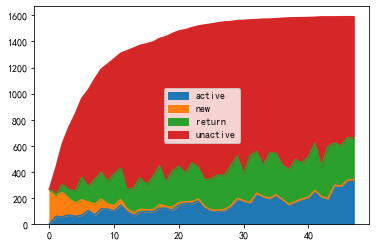

In [58]:
purchase_stats_ct = purchase_stats.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x))
# Replace NaN with 0
purchase_stats_ct.fillna(0).T.plot.area()

From the above results, we can find that the number of active customers, new customers and returning customers fluctuates in a certain pattern every year, which may be related to the year-end promotion, and more data is needed to support this. At the same time, we can find that the number of new customers is decreasing every year, which indicates that the new customer acquisition is ineffective.

### 4.3.5 Repeat Purchase Rate and Retention Rate Analysis
Repeat Purchase Rate：Customers who have made one more transaction in the same month

<AxesSubplot:xlabel='month'>

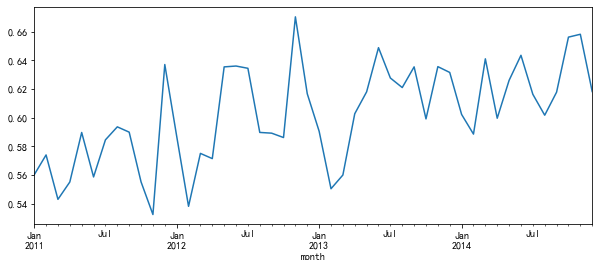

In [59]:
purchase_r = pivoted_counts.applymap(lambda x :1 if x>1 else np.NaN if x==0 else 0)
(purchase_r.sum()/purchase_r.count()).plot(figsize=(10,4))

Retention Rate：Customers who have transactions for two months in a row

<AxesSubplot:>

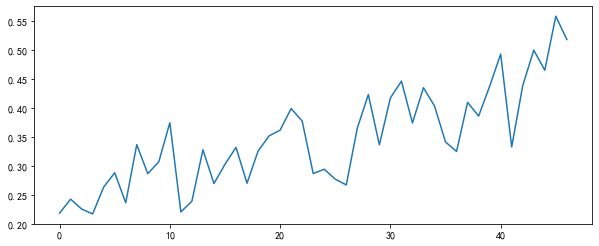

In [60]:
def purchase_back(data):
    status=[]
    for i in range(47):
        if data[i] ==1:
            if data[i+1] == 1:
                status.append(1)
            if data[i+1] == 0:
                status.append(0)
        else:
            status.append(np.NaN)
    status.append(np.NaN)
    return status

purchase_b = df_purchase.apply(purchase_back,axis =1,result_type='expand')
(purchase_b.sum()/purchase_b.count()).plot(figsize=(10,4))

It can be found that the repurchase rate is basically greater than 0.525 and shows a general upward trend, indicating high customer loyalty. The retention rate shows a peak pattern at the middle and end of the year, which may be related to discount promotion.